# <font color='blue'>Credit Card Lead Prediction</font>
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings. The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

### Objective:
To identify customers that could show higher intent towards a recommended credit card, given:

- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

### Data Dictionary
- **ID:** Unique Identifier for a row
- **Gender:** Gender of the Customer
- **Age:** Age of the Customer (in Years)
- **Region_Code:** Code of the Region for the customers
- **Occupation:** Occupation Type for the customer
- **Channel_Code:** Acquisition Channel Code for the Customer  (Encoded)
- **Vintage:** Vintage for the Customer (In Months)
- **Credit_Product:** If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)
- **Avg_Account_Balance:** Average Account Balance for the Customer in last 12 Months
- **Is_Active:** If the Customer is Active in last 3 Months
- **Is_Lead(Target):** If the Customer is interested for the Credit Card 
                  0: Customer is not interested
                  1: Customer is interested

### We will perform the following steps:
1. **Data Understanding**
    - Importing the Leads data file
    - Understanding the data
    
    
2. **Data Cleaning**
    - Handling missing Values


3. **Exploratory Data Analysis**
   - Univariate Analysis
   - Bivariate Analysis
    
4. **Data Preparation**
    - Binary Variable conversion
    - Categorical Variables conversion
    - Dropping repeated variable
    - Performing test-train split
    - Feaure Scaling
   
6. **Model Building**
   - Model 1: using all the variables
   - Model 2: Using RFE, with 15 variables
   - Model Evaluation
   - Making prediction on the validation set 
   
7. **Final score calculation and submission**

# <font color='green'>1. Understanding Data</font>

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Read train and test data
leads_data_train = pd.read_csv( '../input/jobathon-may-2021-credit-card-lead-prediction/train.csv') # train dataset
leads_data_test = pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/test.csv') # test dataset

In [ ]:
leads_data_train.head()

In [ ]:
print("Leads dataset train has {0} columns and {1} rows".format(leads_data_train.shape[0],leads_data_train.shape[1]));
print("Leads dataset test has {0} columns and {1} rows".format(leads_data_test.shape[0],leads_data_test.shape[1]))

In [ ]:
#categorical features
categorical = leads_data_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= leads_data_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

In [ ]:
categorical_var = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead']
numerical_var = ['Age', 'Vintage', 'Avg_Account_Balance']
print(categorical_var)
print(numerical_var)

In [ ]:
leads_data_train.info()

# <font color="green">2. Cleaning Data</font>

In [ ]:
# Percentage of null values in train dataset
leads_data_train.isnull().sum()/len(leads_data_train)*100

In [ ]:
# Percentage of null values in Test dataset
leads_data_test.isnull().sum()/len(leads_data_test)*100

Train and Test dataset has almost **12%** missing values in `Credit_Product`.

Let us replace null values as `Unknown`.

In [ ]:
leads_data_train['Credit_Product'].replace(np.nan, 'Unknown', inplace=True)
leads_data_test['Credit_Product'].replace(np.nan, 'Unknown', inplace=True)

In [ ]:
# Re-checking for null values
leads_data_train.isnull().sum()/len(leads_data_train)*100

In [ ]:
# Rechecking for null values
leads_data_test.isnull().sum()/len(leads_data_test)*100

# <font color="green">3. Exploratory data analysis</font>

## Univariate Analysis (numerical)

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
for k,v in enumerate(numerical_var):
    plt.subplot(2,2,k+1)
    plt.ylabel("Count")
    sns.distplot(leads_data_train[v])
plt.show()

In [ ]:
# Boxplot 
plt.figure(figsize=(15,10))

for i,col in enumerate(numerical_var):
    plt.subplot(2,2,i+1);
    sns.boxplot(leads_data_train[col])
    plt.xlabel(col,fontdict={'fontsize':12})
    plt.ylabel("Count",fontdict={'fontsize':12})

#### `INFERENCE`:
1. From both box plot and distplot, we can observe that `Avg_Account_Balance` is right skewed.

## Univariate Analysis (Categorical)

In [ ]:
plt.figure(figsize=(15, 15))
variables = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead']
for k,v in enumerate(variables):
    plt.subplot(3,2,k+1)
    sns.countplot(v,data=leads_data_train)
    plt.xlabel(v)
    plt.xticks(rotation = 0)
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))

sns.countplot('Region_Code',data=leads_data_train)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
leads_data_train['Is_Lead'].value_counts(normalize=True)*100

**Rate of Conversion** is almost `24%`

## Bivariate Analysis (numerical vs numerical)

In [ ]:
# Pair plot for Numeric Variables

sns.pairplot(leads_data_train[numerical_var])
plt.show()

In `vintage vs Age` scatter plot we can observe that all the data points are below a line. There are no data points above that line. May be there is Max vintage within an age group (23-40). Below is the image for reference.<br>
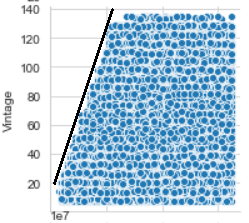


## Bivariate Analysis (categorical vs numerical)

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'Age', x = 'Is_Lead', data = leads_data_train)

plt.subplot(2,2,2)
sns.boxplot(y = 'Vintage', x = 'Is_Lead', data = leads_data_train)

plt.subplot(2,2,3)
sns.boxplot(y = 'Avg_Account_Balance', x = 'Is_Lead', data = leads_data_train)
plt.show()

### `INFERENCE`:
1. Median and spread of Avg_Account_Balance in lead and not lead is almost same.
2. Median Age of customers who are leads is more than that of not lead customers. 
3. Median Vintage of customers who are leads is more than that of not lead customers. The spread is also more in case of customers who are leads 

## Bivariate Analysis (categorical vs categorical)

In [ ]:
# Gender vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Gender', hue='Is_Lead', data=leads_data_train)
plt.show()

In [ ]:
leads_data_train[leads_data_train['Gender']=='Male']['Is_Lead'].value_counts(normalize= True)*100

In [ ]:
leads_data_train[leads_data_train['Gender']=='Female']['Is_Lead'].value_counts(normalize= True)*100

### `INFERENCE`: 
Conversion rate of male (26%) is higher than female (20%).

In [ ]:
# Occupation vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Occupation', hue='Is_Lead', data=leads_data_train)
plt.show()

In [ ]:
leads_data_train[leads_data_train['Occupation']=='Entrepreneur']['Is_Lead'].value_counts(normalize= True)*100

In [ ]:
leads_data_train[leads_data_train['Occupation']=='Salaried']['Is_Lead'].value_counts(normalize= True)*100

### `INFERENCE`: 
1. We can observe that conversion rate among `Entrepreneurs` is high (66%). Company should focus on getting more Entrepreneurs Leads.
2. Conversion rate among `Salaried` customers is low (15%).

In [ ]:
# Credit_Product vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Credit_Product', hue='Is_Lead', data=leads_data_train)
plt.show()

In [ ]:
leads_data_train[leads_data_train['Credit_Product']=='No']['Is_Lead'].value_counts(normalize= True)*100

In [ ]:
leads_data_train[leads_data_train['Credit_Product']=='Yes']['Is_Lead'].value_counts(normalize= True)*100

In [ ]:
leads_data_train[leads_data_train['Credit_Product']=='Unknown']['Is_Lead'].value_counts(normalize= True)*100

### `INFERENCE`:
Conversion rate among customers with Credit_Product is more (31%) as compared to customers without Credit_Product (7%). 

In [ ]:
# Is_Active vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Is_Active', hue='Is_Lead', data=leads_data_train)
plt.show()

In [ ]:
leads_data_train[leads_data_train['Is_Active']=='No']['Is_Lead'].value_counts(normalize= True)*100

In [ ]:
leads_data_train[leads_data_train['Is_Active']=='Yes']['Is_Lead'].value_counts(normalize= True)*100

### `INFERENCE`:
Conversion rate among customers who were active in last 3 Months is more (28%) as compared to customers who were not active (20%). 

In [ ]:
# Channel_Code vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Channel_Code', hue='Is_Lead', data=leads_data_train)
plt.show()

In [ ]:
leads_data_train[leads_data_train['Channel_Code']=='X1']['Is_Lead'].value_counts(normalize= True)*100

In [ ]:
leads_data_train[leads_data_train['Channel_Code']=='X2']['Is_Lead'].value_counts(normalize= True)*100

In [ ]:
leads_data_train[leads_data_train['Channel_Code']=='X3']['Is_Lead'].value_counts(normalize= True)*100

In [ ]:
leads_data_train[leads_data_train['Channel_Code']=='X4']['Is_Lead'].value_counts(normalize= True)*100

### `INFERENCE`:
We can observe that conversion rate in Channel_Code X1 is very low (9%) and good in X3 (36%). Company should get more customers from Channel_Code X3 and focus on improving leads from Channel_Code X1.

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(leads_data_train.corr(),annot = True,linewidths=.5, cmap="YlGnBu")
plt.show()

There is positive correlation between Age and Vintage (63%).

### Final INFERENCES from EDA:
1. Conversion rate of male (26%) is higher than female (20%).
2. We can observe that conversion rate among `Entrepreneurs` is high (66%). Company should focus on getting more Entrepreneurs Leads.
3. Conversion rate among `Salaried` customers is low (15%).Company should focus on improving leads with `Salaried` customers.
4. Conversion rate among customers `with Credit_Product` is more (31%) as compared to customers `without Credit_Product` (20%).
5. Conversion rate among customers who were active in last 3 Months is more (28%) as compared to customers who were not active (20%).
6. We can observe that conversion rate in `Channel_Code X1` is very low (9%) and good in `Channel_Code X3` (36%). Company should get more customers from Channel_Code X3 and focus on improving leads from Channel_Code X1.

#  <font color='green'>5. Data Preparation</font>
- Binary Variable conversion
- Categorical Variables conversion
- Dropping repeated variable
- Performing test-train split
- Feaure Scaling

In [ ]:
leads_data_train.head()

### Binary Variable conversion¶
There are some columns like `Credit_Product` and `Is_Active` have Yes, No values, so we will convert them to 1,0 respectively.

In [ ]:
binaryList = ['Is_Active']

# Defining the map function
def binaryMapping(x):
    return x.map({'Yes': 1, "No": 0})

# Train data
leads_data_train[binaryList] = leads_data_train[binaryList].apply(binaryMapping)

# Test data
leads_data_test[binaryList] = leads_data_test[binaryList].apply(binaryMapping)

In [ ]:
leads_data_train.head()

In [ ]:
leads_data_test.head()

### Dummy Variables¶
We will create dummy variables for categorical variables with more than 2 levels.

In [ ]:
variables = ['Gender','Region_Code', 'Occupation', 'Channel_Code','Credit_Product']
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyList_train = pd.get_dummies(leads_data_train[variables], drop_first=True)
dummyList_test = pd.get_dummies(leads_data_test[variables], drop_first=True)

In [ ]:
# Adding the results to leads_data
leads_data_train = pd.concat([leads_data_train, dummyList_train], axis=1)
leads_data_test = pd.concat([leads_data_test, dummyList_test], axis=1)

In [ ]:
# Dropping repeated variable
leads_data_train.drop(variables,axis=1,inplace=True)
leads_data_test.drop(variables,axis=1,inplace=True)

In [ ]:
leads_data_train.shape

In [ ]:
leads_data_test.shape

In [ ]:
leads_data_train.columns

In [ ]:
leads_data_train = leads_data_train.set_index('ID')

In [ ]:
leads_data_test = leads_data_test.set_index('ID')

### Performing test-train split 

In [ ]:
# Creating independant Variable
X = leads_data_train.drop(['Is_Lead'], axis=1)
X.head()

In [ ]:
# Creating dependant Variable
y = leads_data_train['Is_Lead']
y.head()

In [ ]:
# Splitting the data into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Feaure Scaling

In [ ]:
# Scaling Data
scaler = MinMaxScaler()

In [ ]:
numerical_var 

In [ ]:
# there are 3 variables ('Age', 'Vintage', 'Avg_Account_Balance') which are continuous so we will scale them
X_train[numerical_var] = scaler.fit_transform(X_train[numerical_var])

In [ ]:
X_train.head()

In [ ]:
# Transform Validation Data Set
X_valid[numerical_var] = scaler.transform(X_valid[numerical_var])

In [ ]:
# Transform Test Data Set
leads_data_test[numerical_var] = scaler.transform(leads_data_test[numerical_var])

# <font color='green'>6. Model Building</font>
- Model 1: using all the variables
- Model 2: Using RFE, with 15 variables
- Model Evaluation
- Making prediction on the test set

### Model 1: Using all the variables
We will perform Logistic Regression on all the variables first

In [ ]:
import statsmodels.api as sm

In [ ]:
log_model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_model1.fit().summary()

### `INFERENCE: `
We can observe that some of the variables have high p-values(they are insignificant). So we will have to get rid of them. In order to do so will will use RFE to eliminate features.

### Model 2: Using RFE, with 15 variables
We will perform Logistic Regression using 15 variables that are selected by RFE

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15) # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
# columns selected by RFE
col = X_train.columns[rfe.support_]
col

In [ ]:
# model 2 building
log_model2 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

### Model 3: Dropping Region_Code_RG266

In [ ]:
col = col.drop('Region_Code_RG266', 1)
col

In [ ]:
# model 3 building
log_model3 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

P-values are < 0.05, so let us predict target variable using model 3.

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train[col]))
y_train_pred.head()

In [ ]:
y_train_pred_final = pd.DataFrame({'Is_Lead':y_train.values, 'Is_Lead_Prob':y_train_pred.values.reshape(-1)})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
sklearn.metrics.roc_auc_score(y_train_pred_final.Is_Lead, y_train_pred_final.Is_Lead_Prob)

Area under the curve in train dataset is 85.8%

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_train_pred_final.Is_Lead, y_train_pred_final.Is_Lead_Prob)
auc = metrics.roc_auc_score(y_train_pred_final.Is_Lead, y_train_pred_final.Is_Lead_Prob)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(round(auc,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.show()

# <font color='green'> 7. Making prediction on the Vaidation set </font>

In [ ]:
X_valid = X_valid[col]
X_valid.head()

In [ ]:
X_valid_sm = sm.add_constant(X_valid)

In [ ]:
y_valid_pred = res.predict(X_valid_sm)
y_valid_pred.head(10)

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_valid_pred)
y_pred_1.columns = ['Is_Lead_Prob']
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_valid)
y_test_df.reset_index()

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

In [ ]:
sklearn.metrics.roc_auc_score(y_pred_final.Is_Lead, y_pred_final.Is_Lead_Prob)

Area under the curve in validation set is **85.7%**

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_pred_final.Is_Lead, y_pred_final.Is_Lead_Prob)
auc = metrics.roc_auc_score(y_pred_final.Is_Lead, y_pred_final.Is_Lead_Prob)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(round(auc,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.show()

# <font color='green'> 8. Making prediction on the Test set (submission) </font>

In [ ]:
X_test = leads_data_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)
final_predictions = res.predict(X_test_sm)
final_predictions.head()

In [ ]:
submission_df = pd.DataFrame(final_predictions)

In [ ]:
submission_df.columns = ['Is_Lead']

In [ ]:
submission_df.reset_index()

In [ ]:
submission_df.to_csv('my_sample_submission.csv',index = True) # export to a csv file